In [15]:
import pandas as pd
import numpy as np

In [98]:
dallas = pd.read_csv("/Users/joshnoble/projects/w210/evictions/NTEP_eviction_cases.csv", low_memory=False)

In [86]:
dallas.head()

,case_number,date,amount,precinct_id,council_id,tract_id,zip_id,city_id,county_id,lon,lat
0,1804351H,2018-07-10,1590.0,48113-1-1,4819000-07,4.811300e+10,75215.0,4819000.0,48113,-96.780003,32.762274
1,1804378H,2018-07-10,1217.0,48113-1-1,4819000-07,4.811300e+10,75215.0,4819000.0,48113,-96.757373,32.767008
2,1804374H,2018-07-10,0.0,48113-1-1,4819000-07,4.811300e+10,75210.0,4819000.0,48113,-96.743293,32.775399
3,1804376H,2018-07-10,700.0,48113-1-1,4819000-07,4.811300e+10,75210.0,4819000.0,48113,-96.743307,32.775385
4,1804375H,2018-07-10,700.0,48113-1-1,4819000-07,4.811300e+10,75210.0,4819000.0,48113,-96.742441,32.776028


In [99]:
dallas = dallas[(dallas['amount'] > 0) & (dallas['date'].notna()) & (dallas['tract_id'].notna())]

dallas['tract_id'] = dallas['tract_id'].astype(np.int64)

In [88]:
dallas.head()

,case_number,date,amount,precinct_id,council_id,tract_id,zip_id,city_id,county_id,lon,lat
0,1804351H,2018-07-10,1590.0,48113-1-1,4819000-07,48113003400,75215.0,4819000.0,48113,-96.780003,32.762274
1,1804378H,2018-07-10,1217.0,48113-1-1,4819000-07,48113003700,75215.0,4819000.0,48113,-96.757373,32.767008
3,1804376H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.743307,32.775385
4,1804375H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.742441,32.776028
5,1804377H,2018-07-10,656.0,48113-1-1,4819000-14,48113003101,75201.0,4819000.0,48113,-96.798797,32.781548


In [172]:
dallas.to_csv("cleaned_dallas_records.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffda8683880>]],
      dtype=object)

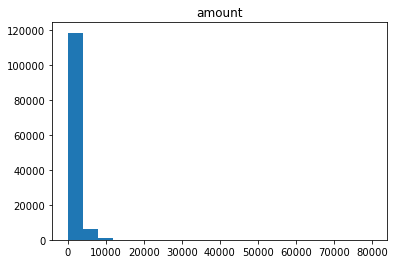

In [89]:
dallas.hist(column='amount', bins=20, grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffdd8fd95b0>]],
      dtype=object)

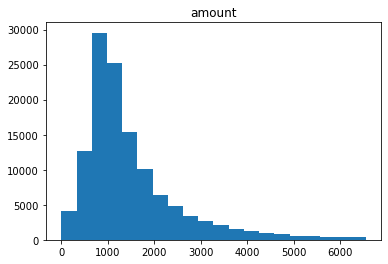

In [100]:
from scipy import stats

dallas = dallas[(np.abs(stats.zscore(dallas['amount'])) < 3)]
dallas.hist(column='amount', bins=20, grid=False)

In [153]:
grouped_df = dallas.groupby(["tract_id"])
#grouped_df[["amount"]].mean().sort_values('tract')
most_common_tracts = grouped_df['tract_id'].count().sort_values(ascending=False)

In [129]:
most_common_tracts[:40]

tract_id
48113016607    2323
48113019035    1837
48113010902    1684
48113012604    1624
48113007811    1482
48113010904    1472
48113018503    1446
48113018506    1292
48113007202    1021
48113012210    1014
48113016804     896
48113013011     894
48113008604     883
48113012000     883
48113013010     872
48113020400     861
48113013806     841
48113017813     828
48113013615     823
48113019040     814
Name: tract_id, dtype: int64

In [173]:
means = []

for key in most_common_tracts[:40].keys():
    print(key)
    t = dallas[dallas['tract_id'] == key]
    means.append({'tract' : key, 'mean' : t['amount'].mean(), 'max' : t['amount'].max(), 'min' : t['amount'].min()})

48113016607
48113019035
48113010902
48113012604
48113007811
48113010904
48113018503
48113018506
48113007202
48113012210
48113016804
48113013011
48113008604
48113012000
48113013010
48113020400
48113013806
48113017813
48113013615
48113019040
48113008704
48113009304
48113008701
48113017805
48113007818
48113012302
48113016605
48113013621
48113011001
48113007201
48113018505
48113006100
48113012100
48113014403
48113002000
48113017004
48113006800
48113011401
48113018138
48113006002


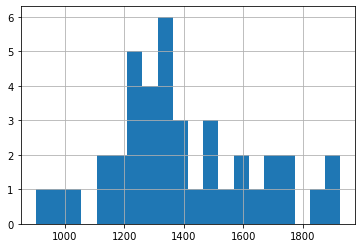

In [175]:
means_df = pd.DataFrame(means)
means_df['mean'].hist(bins=20)

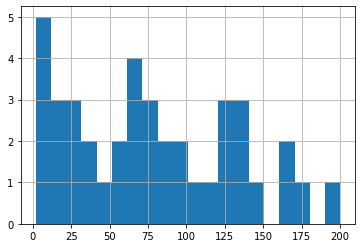

In [176]:
means_df['min'].hist(bins=20)